# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Devoir 2 - Régression linéaire ( 15 points )

Le présent devoir concerne les notions de la régression linéaire vues au Chapitre 2 du cours. Pour ce devoir, vous devez élaborer une analyse complète de régression à l'exercice 1 pour répondre aux questions de l'exercice 2.


## Devoir effectué par

Jalbert, Jonathan - N6MAA10816

**Déclaration d’intégrité relative au plagiat**

Nous certifions sur l’honneur :
- Que les résultats décrits dans ce rapport sont l’aboutissement de notre travail.
- Que nous sommes les auteurs de ce rapport.
- Que nous n'avons pas utilisé des sources ou résultats tiers sans clairement les citer et les référencer selon les règles bibliographiques préconisées.

Nous déclarons que ce travail ne peut être soupçonné de plagiat.



## Contexte : Glycémie des patients

Nous étudierons la glycémie sanguine (glu) en fonction de plusieurs variables explicatives : 
- l'âge du patient (age)
- l'indice de masse corporel du patient (bmi)
- le sexe du patient (sex)
- de la tension artérielle moyenne (map) 
- 5 indicateur sanguins (tc, ldl, hdl, tch et ltg). 


## Consignes

- Le devoir doit être remis sur Moodle **avant 23h59 lundi le 15 février 2020**. Les retards ne seront pas tolérés car le solutionnaire sera publié dès mardi.
- Le devoir a une pondération de 15%.
- Écrivez vos noms et vos matricules dans l'espace prévu à cet effet dans cette cellule.
- Vous pouvez compléter le devoir en équipe de deux personnes. Dans ce cas, un seul fichier par équipe doit être remis. Pour vous aider à trouver un coéquipier, le canal de discussion *#trouver_un_coéquipier* a été créé sur Slack.
- Le devoir doit être complété dans le présent calepin Jupyter en ajoutant autant de cellules de texte et de code que nécessaires. Vous remettrez ce fichier en format *.ipynb*. Le nom du fichier doit être *matricule1_matricule2_devoir2.ipynb*.
- N'utilisez que les librairies introduites à la cellule suivante.

## Chargement des libairies

In [1]:
using CSV 
using DataFrames
using Distributions
using Gadfly
using LinearAlgebra
using Statistics

## Chargement des données

In [2]:
data = CSV.read("diabetes.csv", DataFrame)
select!(data, Not(:prog))
first(data,5)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
,Int64,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,59,1,32.1,101.0,157,93.2,38.0,4.0,2.11,87
2,48,0,21.6,87.0,183,103.2,70.0,3.0,1.69,69
3,72,1,30.5,93.0,156,93.6,41.0,4.0,2.03,85
4,24,0,25.3,84.0,198,131.4,40.0,5.0,2.12,89
5,50,0,23.0,101.0,192,125.4,52.0,4.0,1.86,80


## Exercice 1 - Régression linéaire simple (5 points)

### (a) Estimez les coefficients de régression de la régression linéaire simple en utilisant la tension artérielle moyenne (map) comme variable explicative pour prédire la glycémie (gly).

In [3]:
y = data.glu
n = length(y)

X = hcat(ones(n), data.map)
β̂ = X\y

2-element Array{Float64,1}:
 60.54670237176914
  0.3245069190864332

### (b) Calculez le coefficient de détermination du modèle en (a).

In [4]:
ȳ = mean(y)
SST = sum((y[i] - ȳ)^2 for i in eachindex(y))

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

R² = 1 - SSE/SST

0.15244004445789705

### (c) Est-ce que la tension artérielle moyenne possède un pouvoir prédictif significatif pour la glycémie ?

Justifiez bien votre réponse.

In [5]:
p = size(X,2)-1

SSR = SST - SSE

Fₒ = (n-p-1)/p * SSR/SSE

pd = FDist(p, n-p-1)

valeurp = 1-cdf(pd, Fₒ)

# La valeur-p est plus petite que 5% alors on peut conclure que la tension artérielle moyenne possède un pouvoir
# prédictif significatif.

0.0

### (d) Si un patient a une tension artérielle moyenne de 100, calculez un intervalle de confiance de niveau 95% pour sa glycémie.

In [6]:
x₀ = [1.0, 100.0]

# Estimation
ŷ₀ = x₀'*β̂

# Estimation de la variance de l'erreur
σ̂² = 1/(n-p-1)*sum( e.^2 )

# Marge d'erreur
s = quantile(TDist(n-p-1), .975) * sqrt(σ̂²*(1+x₀'*inv(X'X)*x₀))

# Intervalle de prédiction
[ŷ₀ - s, ŷ₀ + s]

2-element Array{Float64,1}:
  72.14546576298298
 113.84932279784195

### (e) Considérez l'indice de masse corporel comme (bmi) comme seule variable explicative. Laquelle des deux variables entre bmi et map possède le plus grand pouvoir prédictif de la glycémie ?

Justifiez bien votre réponse.

In [7]:
X = hcat(ones(n), data.bmi)
β̂ = X\y

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

R² = 1 - SSE/SST

# La variable map possède un plus grand pouvoir prédictif car il a un coefficient de détermination supérieur.

0.1510721376581331

## Exercice 2 - Effet du sexe (5 points)

### (a) Ajoutez le sexe comme variable explicative au modèle de l'exercice 1(a). Est-ce que le sexe possède un pouvoir prédictif significatif de la glycémie ?

In [8]:
X = hcat(ones(n), data.map)
β̂ = X\y

p = size(X,2)-1

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

R² = 1 - (n-1)/(n-p-1)*SSE/SST

0.15051377183166503

In [9]:
X = hcat(ones(n), data.map, data.sex)
β̂ = X\y

p = size(X,2)-1

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

R² = 1 - (n-1)/(n-p-1)*SSE/SST

## Le sexe possède un pouvoir prédicitif significatif car le R2 ajusté est plus grand.

0.16244944394699334

### (b) Interprétez les estimations des coefficients de régression que vous avez obtenues en 2 (b).

In [10]:
println(β̂)
println("La glycémie augmente en moyenne de .3 lorsque la tension artérielle moyenne augmente de 1.")
println("La glycémie augmente en moyenne de 2.78 pour les hommes.")

[61.537043941982155, 0.3002564058116288, 2.786280909185307]
La glycémie augmente en moyenne de .3 lorsque la tension artérielle moyenne augmente de 1.
La glycémie augmente en moyenne de 2.78 pour les hommes.


### (c) Choix du modèle bidimensionnel

Considérez le modèle de régression utilisant l'indice de masse corporelle et le sexe comme variables explicatives. Est-ce un meilleur modèle que celui de l'exercice 2(a) ? Est-ce cohérent avec la réponse du 1(e) ? Justifiez.

In [11]:
X = hcat(ones(n), data.bmi, data.sex)
β̂ = X\y

p = size(X,2)-1

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

R² = 1 - (n-1)/(n-p-1)*SSE/SST

println("Ce modèle est meilleur car son coefficient de détermination est supérieur. Le meilleur modèle bidimensionnel n'inclut pas nécessairement le meilleur modèle unidimensionnel.")

Ce modèle est meilleur car son coefficient de détermination est supérieur. Le meilleur modèle bidimensionnel n'inclut pas nécessairement le meilleur modèle unidimensionnel.


## Exercice 3 - Modèle tridimensionnel (5 points)

Considérez maintenant le modèle de régression linéaire utilisants les variables `:map`, `:bmi` et `:sex`.

### (a) Est-ce que l'hypothèse de linéarité semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

Le nuage de points semble bien distributer autour de 0 sans tendance particulière. On peut alors supposer que l'hypothèse de linéarité est raisonnable.


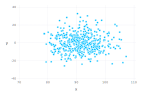

In [12]:
X = hcat(ones(n), data.map, data.bmi, data.sex)
β̂ = X\y

p = size(X,2)-1

ŷ = X*β̂
e = y - ŷ

println("Le nuage de points semble bien distributer autour de 0 sans tendance particulière. On peut alors supposer que l'hypothèse de linéarité est raisonnable.")

plot(x=ŷ, y=e, Geom.point)


### (b) Est-ce que l'hypothèse d'homoscédasticité de la variance semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

In [13]:
println("Le nuage de points semble bien distributé autour de 0 sans tendance particulière. On peut alors supposer que l'hypothèse de linéarité est raisonnable.")


Le nuage de points semble bien distributé autour de 0 sans tendance particulière. On peut alors supposer que l'hypothèse de linéarité est raisonnable.


### (c) Y a-t-il présence de multicolinéarité ?

Justifiez bien votre réponse. S'il y a multicolinéarité, que proposeriez vous pour limiter son effet ?

In [14]:
# Vérification pour la variable :map

y = data.map
X = hcat(ones(n), data.bmi, data.sex)
β̂ = X\y

p = size(X,2)-1

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

ȳ = mean(y)
SST = sum( (y[i] - ȳ)^2 for i in eachindex(y))

R² = 1 - SSE/SST

VIF = 1/(1-R²)

# Pas de problème de multicolinéarité

1.2486585796005722

In [15]:
# Vérification pour la variable :bmi

y = data.bmi
X = hcat(ones(n), data.map, data.sex)
β̂ = X\y

p = size(X,2)-1

ŷ = X*β̂
e = y - ŷ

SSE = sum(e.^2)

ȳ = mean(y)
SST = sum( (y[i] - ȳ)^2 for i in eachindex(y))

R² = 1 - SSE/SST

VIF = 1/(1-R²)

# Pas de problème de multicolinéarité

1.1853565961908525